# Representing Species in RMG

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import rmgpy.data.thermo
import rmgpy.species
import rmgpy.molecule

## RMG Species Class:

- contains information about which atoms are bonded and the bond orders
- bond information can be specified with SMILES, InChI, or an adjacency list
- species has an attribute for thermo, usually a NASA polynomial

Use the website to search for molecules and create adjacency lists: https://rmg.mit.edu/molecule_search

Code for the class can be found here: https://github.com/ReactionMechanismGenerator/RMG-Py/blob/main/rmgpy/species.py

## Adjacency List

Documentation: http://reactionmechanismgenerator.github.io/RMG-Py/reference/molecule/adjlist.html

```
1 C u0 p0 c0 {2,S} {3,S} {4,S} {5,S}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
```

In [2]:
# Initializing with SMILES
methane_smiles = 'C'
methane = rmgpy.species.Species(smiles=methane_smiles)
print(methane.to_adjacency_list())

1 C u0 p0 c0 {2,S} {3,S} {4,S} {5,S}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}



In [3]:
methane

In [4]:
# Initializing with InChI
ethane_inchi = 'InChI=1S/C2H6/c1-2/h1-2H3'
ethane = rmgpy.species.Species(inchi=ethane_inchi)
print(ethane.to_adjacency_list())

1 C u0 p0 c0 {2,S} {3,S} {4,S} {5,S}
2 C u0 p0 c0 {1,S} {6,S} {7,S} {8,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {2,S}
8 H u0 p0 c0 {2,S}



In [5]:
ethane

In [6]:
# Initializing with adjacency list
h2o_graph = """
1 O u0 p2 c0 {2,S} {3,S}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
"""

h2o = rmgpy.species.Species()
h2o.from_adjacency_list(h2o_graph)
# h2o.smiles

## Species Thermo Parameters

In [7]:
print(ethane.thermo)

None


In [8]:
ethane.get_enthalpy(300)

Exception: Unable to calculate enthalpy for species '': no thermo or statmech data available.

In [ ]:
# dir(ethane)

### Thermo Database

In [9]:
# Load Thermo Database

# ref_lib = 'GRI-Mech3.0'
# ref_lib = 'JetSurF2.0'
# Load the reference thermo
library_path = "/path/to/RMG-database/input/thermo/"
database = rmgpy.data.thermo.ThermoDatabase()
database.load(
    library_path,
    libraries = [
        'GRI-Mech3.0',
        'JetSurF2.0'
    ]
    
)

# def load(self, path, libraries=None, depository=True, surface=False):
#         """
#         Load the thermo database from the given `path` on disk, where `path`
#         points to the top-level folder of the thermo database.
#         """
#         if depository:
#             self.load_depository(os.path.join(path, 'depository'))
#         else:
#             self.depository = {}
#         self.load_libraries(os.path.join(path, 'libraries'), libraries)
#         self.load_groups(os.path.join(path, 'groups'))
#         if surface:
#             self.load_surface()

In [10]:
ethane_thermo = database.get_thermo_data(ethane)

In [11]:
ethane_thermo.polynomials[1]
ethane.thermo = ethane_thermo

In [12]:
ethane.get_enthalpy(300)

-83753.79935188919

In [13]:
# NASA polynomials: http://combustion.berkeley.edu/gri-mech/data/nasa_plnm.html

lib_thermo = database.get_thermo_data(ethane)
print(lib_thermo)

NASA(polynomials=[NASAPolynomial(coeffs=[4.29142,-0.00550154,5.99438e-05,-7.08466e-08,2.68686e-11,-11522.2,2.66682], Tmin=(200,'K'), Tmax=(1000,'K')), NASAPolynomial(coeffs=[1.07188,0.0216853,-1.00256e-05,2.21412e-09,-1.90003e-13,-11426.4,15.1156], Tmin=(1000,'K'), Tmax=(3500,'K'))], Tmin=(200,'K'), Tmax=(3500,'K'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(178.761,'J/(mol*K)'), label="""C2H6""", comment="""Thermo library: GRI-Mech3.0""")


In [14]:
print(lib_thermo.polynomials[0])

NASAPolynomial(coeffs=[4.29142,-0.00550154,5.99438e-05,-7.08466e-08,2.68686e-11,-11522.2,2.66682], Tmin=(200,'K'), Tmax=(1000,'K'))


In [15]:
gav_thermo = database.get_thermo_data_from_groups(ethane)

In [16]:
all_thermo = database.get_all_thermo_data(ethane)

In [17]:
gav_thermo

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([51.7979,65.6051,78.6592,90.2907,108.951,123.595,147.109],'J/(mol*K)'), H298=(-85.3536,'kJ/mol'), S298=(254.471,'J/(mol*K)'), Cp0=(33.2579,'J/(mol*K)'), CpInf=(178.761,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(Cs-CsHHH) + group(Cs-CsHHH)""")

## Plot the Thermodynamic Parameters vs. Temperature

In [18]:
def plot_thermos(thermos, labels=None):
    %matplotlib inline
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(12, 3)
    fig.tight_layout()
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('H (kJ / mol)')
    ax[0].set_title('Enthalpy vs. Temperature')
    ax[1].set_xlabel('Temperature (K)')
    ax[1].set_ylabel('S (kJ / mol K)')
    ax[1].set_title('Entropy vs. Temperature')
    ax[2].set_xlabel('Temperature (K)')
    ax[2].set_ylabel('Cp (kJ / mol K)')
    ax[2].set_title('Heat Capacity vs. Temperature')
    T = np.linspace(300, 3000, 1001)
    for thermo in thermos:
        H = np.zeros(len(T))
        S = np.zeros(len(T))
        Cp = np.zeros(len(T))
        for i in range(0, len(T)):
            H[i] = thermo.get_enthalpy(T[i]) / 1000.0
            S[i] = thermo.get_entropy(T[i]) / 1000.0
            Cp[i] = thermo.get_heat_capacity(T[i]) / 1000.0
        ax[0].plot(T, H)
        ax[1].plot(T, S)
        ax[2].plot(T, Cp)
    ax[0].legend(labels)
    ax[1].legend(labels)
    ax[2].legend(labels)
    plt.subplots_adjust(wspace=0.25)

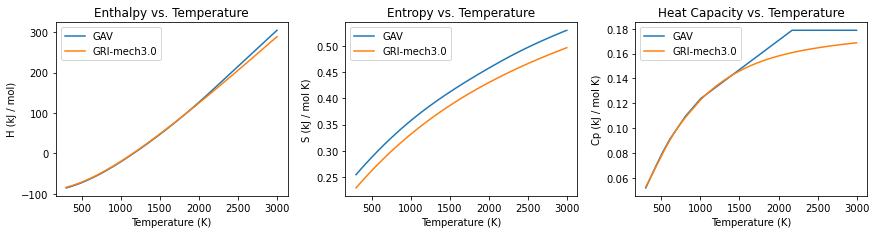

In [19]:
plot_thermos([gav_thermo, lib_thermo], labels=['GAV', 'GRI-mech3.0'])